# Logistic Regression

### Import data

In [25]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/resume.csv')
df = df[['received_callback', 'honors']]

### Data structure

In [26]:
df

,received_callback,honors
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
4865,0,0
4866,0,0
4867,0,0
4868,0,0


In [56]:
df['received_callback'].value_counts()

0    4478
1     392
Name: received_callback, dtype: int64

In [57]:
df['honors'].value_counts()

0    4613
1     257
Name: honors, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   received_callback  4870 non-null   int64
 1   honors             4870 non-null   int64
dtypes: int64(2)
memory usage: 76.2 KB


### Variable lists

In [28]:
# define outcome variable as y_label
y_label = 'received_callback'

# select features
features = 'honors'

# create feature data
X = df[[features]]

# create response
y = df[y_label]

### Data split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## Model

### Select model

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf = LogisticRegression()

### Training & validation

In [38]:
from sklearn.model_selection import cross_val_score

# cross-validation with 5 folds
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

In [39]:
# store cross-validation scores
df_scores = pd.DataFrame({"logistic": scores})

# reset index to match the number of folds
df_scores.index += 1

# print dataframe
df_scores.style.background_gradient(cmap='Blues')

,logistic
1,0.919355
2,0.919355
3,0.919355
4,0.917889
5,0.919236


In [40]:
import altair as alt

alt.Chart(df_scores.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("logistic", aggregate="mean", title="F1")
)

alt.Chart(...)

In [41]:
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
logistic,5.0,0.919038,0.000645,0.917889,0.919236,0.919355,0.919355,0.919355


### Fit model

In [42]:
# Fit the model to the complete training data
clf.fit(X_train, y_train)

LogisticRegression()

### Coefficients

In [43]:
clf.intercept_

array([-2.48157625])

In [44]:
clf.coef_

array([[0.76660242]])

### Evaluation on test set

In [45]:
y_pred = clf.predict(X_test)

In [46]:
# Return the mean accuracy on the given test data and labels:
clf.score(X_test, y_test)

0.920602327173169

### Confusion matrix

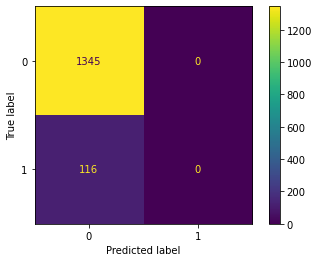

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

### Classification report

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1345
           1       0.00      0.00      0.00       116

    accuracy                           0.92      1461
   macro avg       0.46      0.50      0.48      1461
weighted avg       0.85      0.92      0.88      1461



/Users/jankirenz/opt/anaconda3/envs/ds/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jankirenz/opt/anaconda3/envs/ds/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jankirenz/opt/anaconda3/envs/ds/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

### ROC Curve

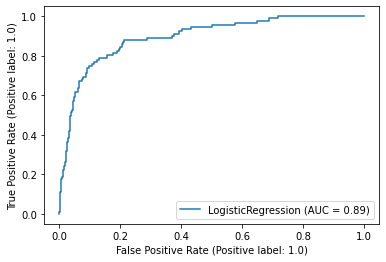

In [181]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_test, y_test);

### AUC Score

In [49]:
from sklearn.metrics import roc_auc_score

In [50]:
roc_auc_score(y_test, clf.decision_function(X_test))

0.5386328675810794

Option 2 to obtain AUC:

In [51]:
y_score = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_score)

0.5386328675810794

### Change threshold

Use specific threshold

In [52]:
# obtain probabilities
pred_proba = clf.predict_proba(X_test)

In [53]:
# set threshold to 0.25

df_25 = pd.DataFrame({'y_pred': pred_proba[:,1] > .25})

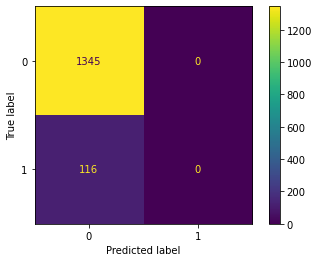

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, df_25['y_pred']);

### Classification report

In [55]:
print(classification_report(y_test, df_25['y_pred'], target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1345
           1       0.00      0.00      0.00       116

    accuracy                           0.92      1461
   macro avg       0.46      0.50      0.48      1461
weighted avg       0.85      0.92      0.88      1461



/Users/jankirenz/opt/anaconda3/envs/ds/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jankirenz/opt/anaconda3/envs/ds/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jankirenz/opt/anaconda3/envs/ds/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta